In [ ]:
# Data Cleaning & pre-processing
# Exploratory Data Analysis
# Data Splitting

# Credit Card Fraud Detection using below models:
# Logistic Regression
# Decision Tree Classifier
# Gaussian Naive Bayes model
# Random Forest Classifier

In [1]:
%matplotlib inline 
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
credit_data = pd.read_csv("creditcard_2023.csv")
print(credit_data.columns.values)
print('Shape of the dataset:', credit_data.shape)

['id' 'V1' 'V2' 'V3' 'V4' 'V5' 'V6' 'V7' 'V8' 'V9' 'V10' 'V11' 'V12' 'V13'
 'V14' 'V15' 'V16' 'V17' 'V18' 'V19' 'V20' 'V21' 'V22' 'V23' 'V24' 'V25'
 'V26' 'V27' 'V28' 'Amount' 'Class']
Shape of the dataset: (568630, 31)


In [3]:
#Basic Stats of the dataset
credit_data.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-1.109271e-14,-3.429498e-14,-1.209242e-14,3.825991e-15,6.288281e-15,-2.751174e-14,1.240002e-14,8.208047e-15,-1.002980e-14,...,2.210679e-15,-8.767441e-16,4.376179e-16,6.825608e-16,2.545689e-15,1.781906e-15,2.817586e-15,2.891419e-15,12041.957635,0.5
std,164149.486121,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [5]:
#Check for missing values
credit_data.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
#Count of fradulent(1) and non-fradulent(0) records in dataset
credit_data["Class"].value_counts()
nonfraudulent = credit_data[credit_data.Class == 0] 
fraudulent = credit_data[credit_data.Class == 1]

print('Total fradulent transactions: ',fraudulent.shape)
print('Total non-fradulent transactions: ',nonfraudulent.shape)

#Comparing both transactions by mean
credit_data.groupby('Class').mean()

Total fradulent transactions:  (284315, 31)
Total non-fradulent transactions:  (284315, 31)


,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,142442.987714,0.505761,-0.491878,0.682095,-0.735981,0.338639,0.435088,0.491234,-0.144294,0.585522,...,-0.179851,-0.10964,-0.014098,-0.010255,0.130107,-0.061847,-0.071052,-0.214002,-0.102024,12026.313506
1,426186.012286,-0.505761,0.491878,-0.682095,0.735981,-0.338639,-0.435088,-0.491234,0.144294,-0.585522,...,0.179851,0.10964,0.014098,0.010255,-0.130107,0.061847,0.071052,0.214002,0.102024,12057.601763


In [7]:
credit_data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


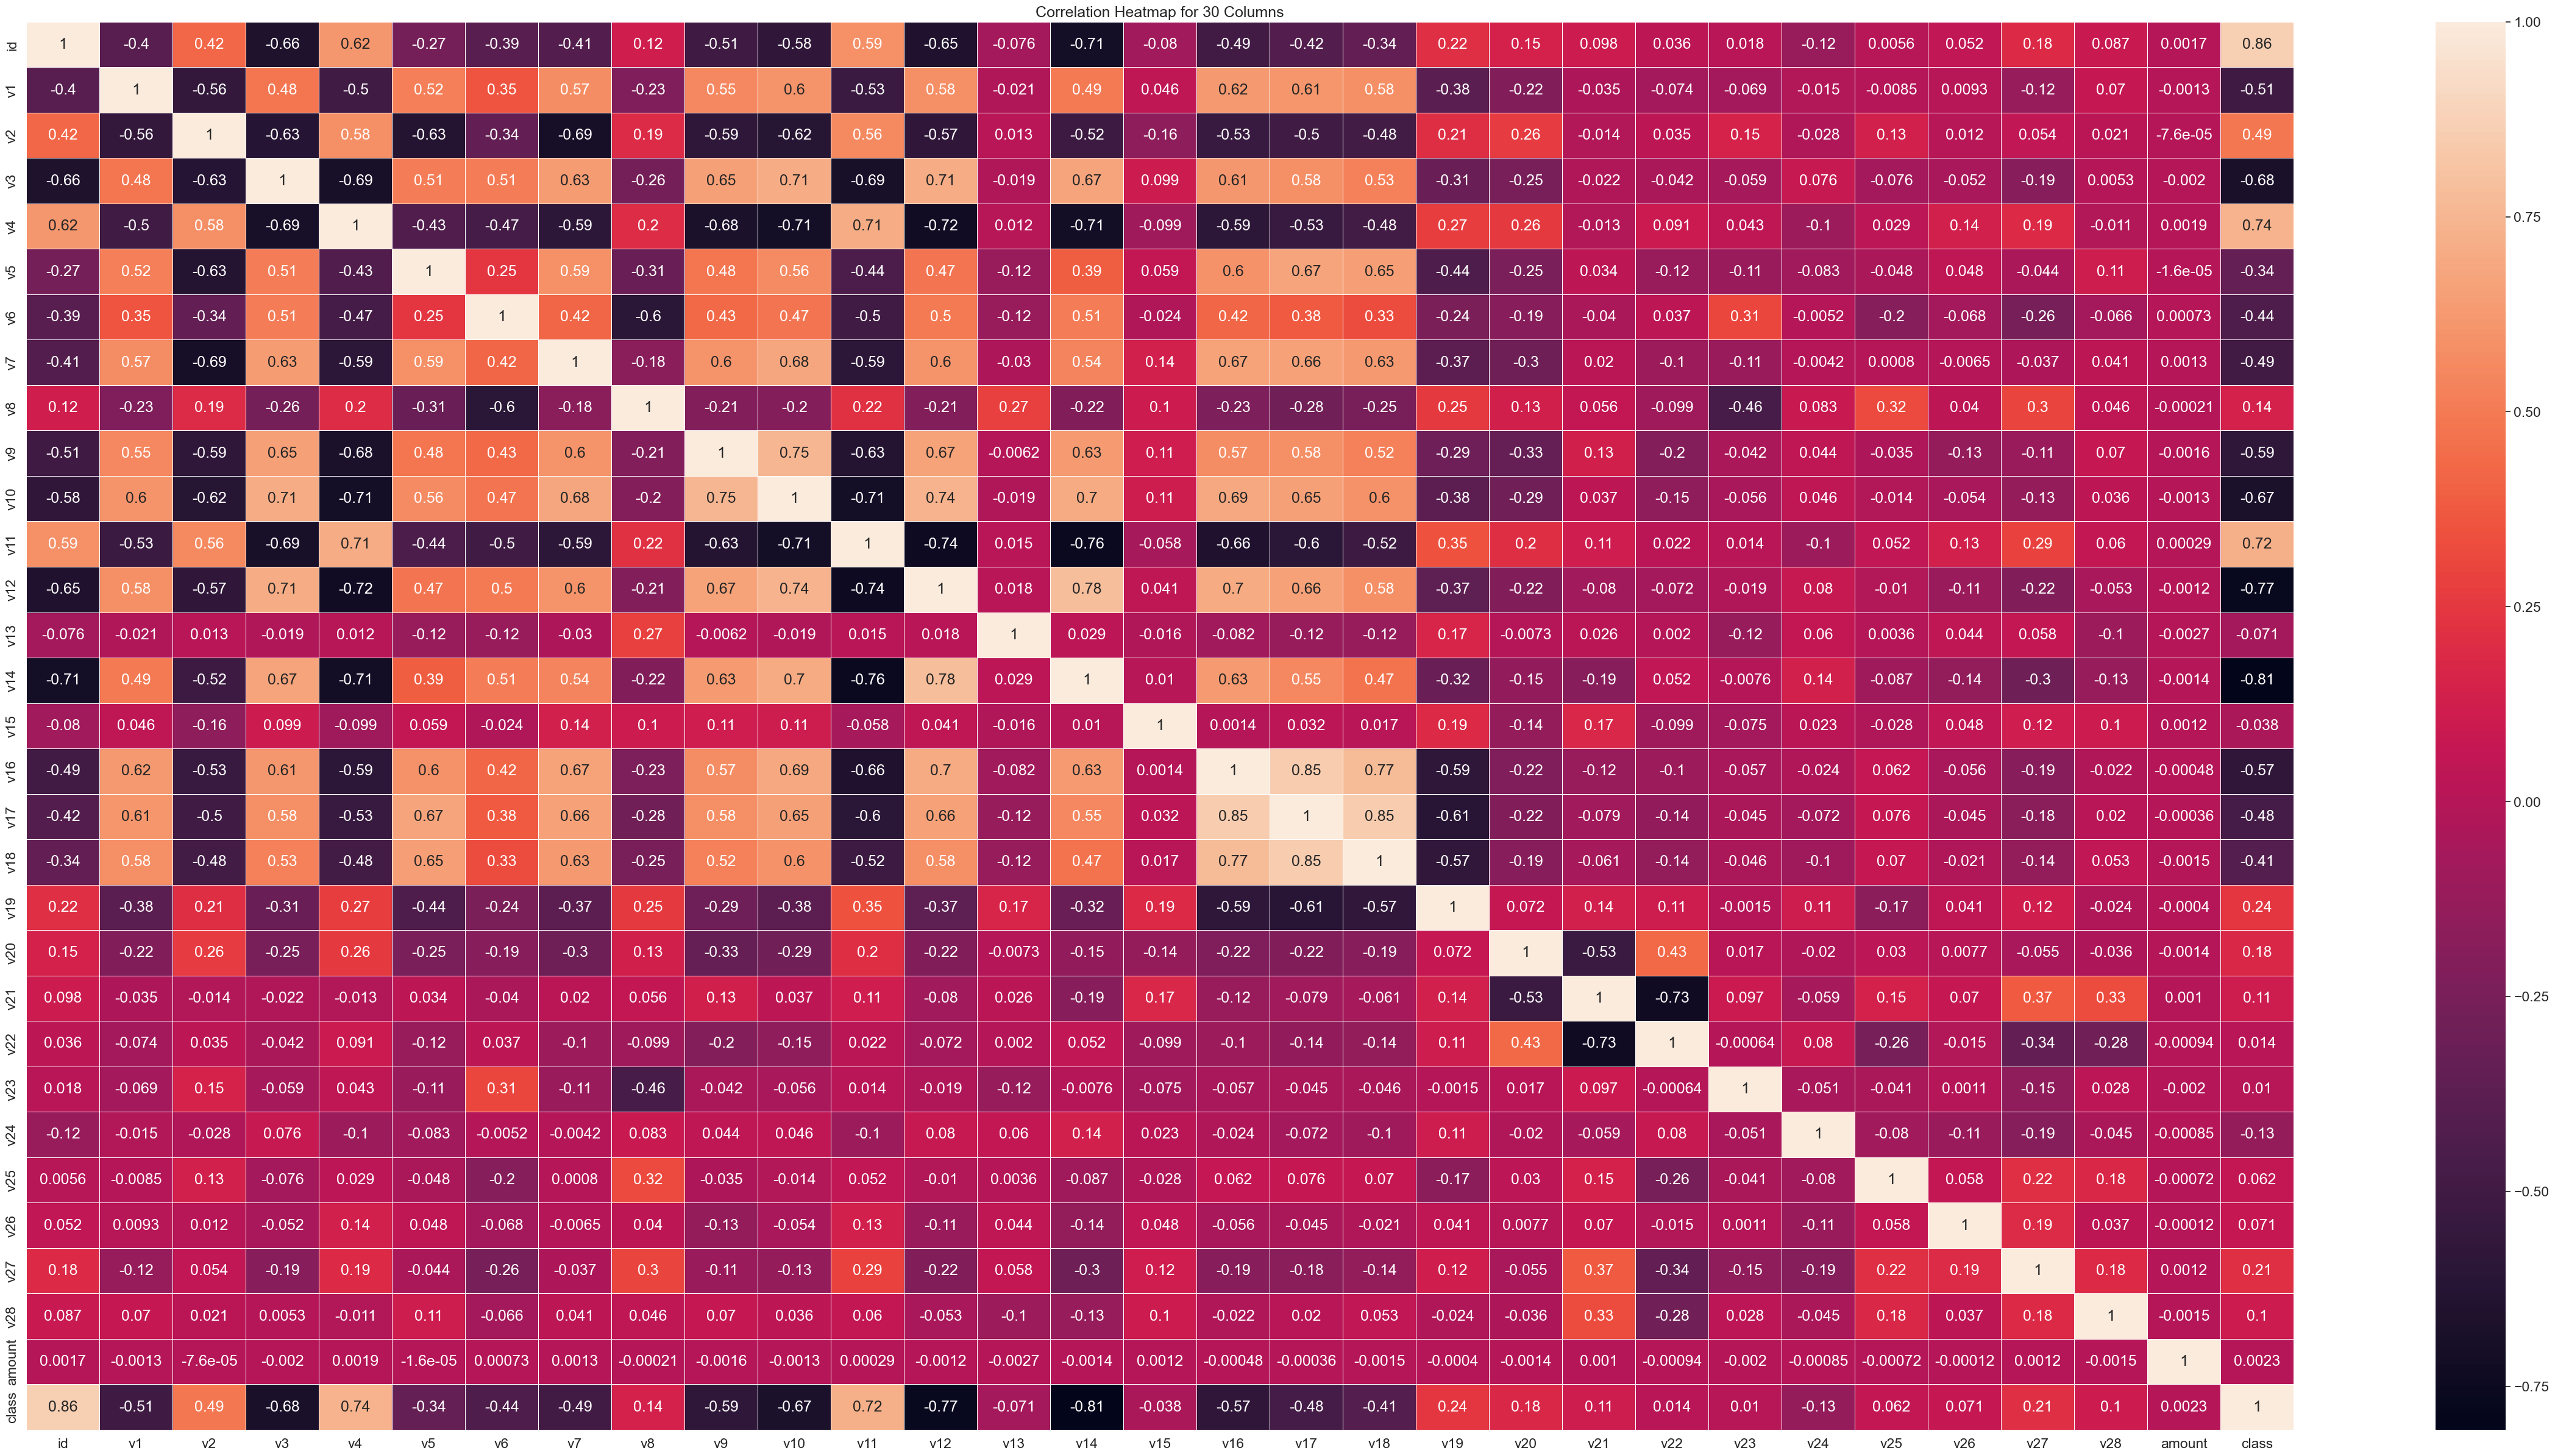

In [8]:
data = {
    'id': credit_data['id'],
    'v1' : credit_data['V1'],
    'v2' : credit_data['V2'],
    'v3' : credit_data['V3'],
    'v4' : credit_data['V4'],
    'v5' : credit_data['V5'],
    'v6' : credit_data['V6'],
    'v7' : credit_data['V7'],
    'v8' : credit_data['V8'],
    'v9' : credit_data['V9'],
    'v10' : credit_data['V10'],
    'v11' : credit_data['V11'],
    'v12' : credit_data['V12'],
    'v13' : credit_data['V13'],
    'v14' : credit_data['V14'],
    'v15' : credit_data['V15'],
    'v16' : credit_data['V16'],
    'v17' : credit_data['V17'],
    'v18' : credit_data['V18'],
    'v19' : credit_data['V19'],
    'v20' : credit_data['V20'],
    'v21' : credit_data['V21'],
    'v22' : credit_data['V22'],
    'v23' : credit_data['V23'],
    'v24' : credit_data['V24'],
    'v25' : credit_data['V25'],
    'v26' : credit_data['V26'],
    'v27' : credit_data['V27'],
    'v28' : credit_data['V28'],
    'amount' : credit_data['Amount'],
    'class' : credit_data['Class']
    
}

# Create a DataFrame from the dataset
df = pd.DataFrame(data)

# Compute the correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(60, 30))  # Increase the figure size
sns.set(font_scale=1.5)  # Adjust font size for annotations
sns.heatmap(corr_matrix, annot=True, linewidths=0.5)
plt.title('Correlation Heatmap for 30 Columns')
plt.show()

In [9]:
x = credit_data.drop(columns='Class' , axis=1) 

y = credit_data['Class']

In [10]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.3, random_state = 2)
print('X Train: ', x_train.shape)
print('X Test: ', x_test.shape )
print('Y Train: ', y_train.shape)
print('Y Test: ', y_test.shape)

X Train:  (398041, 30)
X Test:  (170589, 30)
Y Train:  (398041,)
Y Test:  (170589,)


In [11]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(x_train , y_train)
y_train_pred = log_model.predict(x_train)
y_test_pred = log_model.predict(x_test)

In [12]:
y_train_pred, y_test_pred

(array([0, 0, 0, ..., 1, 0, 0], dtype=int64),
 array([1, 0, 1, ..., 0, 1, 1], dtype=int64))

In [13]:
#MSE for training set
e_train = y_train-y_train_pred
MSE_train = np.mean(e_train**2)
print('The MSE for Training set: ',MSE_train)

#MSE for Test set
e_test = y_test-y_test_pred
MSE_test = np.mean(e_test**2)
print('The MSE for Test set: ',MSE_test)


The MSE for Training set:  0.2087146801460151
The MSE for Test set:  0.2089700977202516


In [14]:
#R-squared of train and test model

print('R-squared for training set: ', log_model.score(x_train,y_train))
print('R-squared for test set: ', log_model.score(x_test,y_test))


R-squared for training set:  0.7912853198539849
R-squared for test set:  0.7910299022797485


In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score

my_matrix = confusion_matrix(y_test, y_test_pred)
print(my_matrix)
print('Accuracy: ', accuracy_score(y_test, y_test_pred))
print('Precision: ', precision_score(y_test, y_test_pred))
print('F1 score: ', f1_score(y_test, y_test_pred))

[[56491 28494]
 [ 7154 78450]]
Accuracy:  0.7910299022797485
Precision:  0.7335614901256733
F1 score:  0.8148617487587511


In [19]:
#Decision Tree Classifier 

from sklearn.tree import DecisionTreeClassifier
opt_tree = DecisionTreeClassifier(random_state = 0)
opt_tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [20]:
#Training score - Rsquared
print('Training score: ', opt_tree.score(x_train, y_train))

# Predicting the Test set results
y_pred = opt_tree.predict(x_test)

#Predicted Vs Actual
result = np.column_stack((y_pred, y_test))
result_df = pd.DataFrame(result, columns=['Predicted', 'Actual'])
result_df.head(10)

#Test accuracy score - Rsquared
print('Test score: ', opt_tree.score(x_test,y_test))

Training score:  1.0
Test score:  0.9996365533533815


In [21]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('F1 score: ', f1_score(y_test, y_pred))

[[84953    32]
 [   30 85574]]
Accuracy:  0.9996365533533815
Precision:  0.9996261944256244
F1 score:  0.9996378716196483


In [22]:
# Gaussian Naive Bayes model

from sklearn.naive_bayes import GaussianNB
g_nb = GaussianNB()
g_nb.fit(x_train, y_train)

GaussianNB()

In [23]:
#Training score - Rsquared
print('Training score: ', opt_tree.score(x_train, y_train))

# Predicting the Test set results
y_pred = opt_tree.predict(x_test)

#Predicted Vs Actual
result = np.column_stack((y_pred, y_test))
result_df = pd.DataFrame(result, columns=['Predicted', 'Actual'])
result_df.head(10)

#Test accuracy score - Rsquared
print('Test score: ', opt_tree.score(x_test,y_test))

Training score:  1.0
Test score:  0.9996365533533815


In [24]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('F1 score: ', f1_score(y_test, y_pred))

[[84953    32]
 [   30 85574]]
Accuracy:  0.9996365533533815
Precision:  0.9996261944256244
F1 score:  0.9996378716196483


In [25]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [26]:
#Training score - Rsquared
print('Training score: ', classifier.score(x_train, y_train))

# Predicting the Test set results
y_pred = classifier.predict(x_test)

#Predicted Vs Actual
result = np.column_stack((y_pred, y_test))
result_df = pd.DataFrame(result, columns=['Predicted', 'Actual'])
result_df.head(10)

#Test accuracy score - Rsquared
print('Test score: ', classifier.score(x_test,y_test))

Training score:  0.9999497539198223
Test score:  0.9998300007620655


In [27]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('F1 score: ', f1_score(y_test, y_pred))

[[84978     7]
 [   22 85582]]
Accuracy:  0.9998300007620655
Precision:  0.9999182137891551
F1 score:  0.9998306005502561
